In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data = pd.read_csv('exams.csv')
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group D,some college,standard,completed,59,70,78
1,male,group D,associate's degree,standard,none,96,93,87
2,female,group D,some college,free/reduced,none,57,76,77
3,male,group B,some college,free/reduced,none,70,70,63
4,female,group D,associate's degree,standard,none,83,85,86
...,...,...,...,...,...,...,...,...
995,male,group C,some college,standard,none,77,77,71
996,male,group C,some college,standard,none,80,66,66
997,female,group A,high school,standard,completed,67,86,86
998,male,group E,high school,standard,none,80,72,62


In [3]:
data.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [5]:
data.duplicated().sum()

0

In [6]:
data.shape

(1000, 8)

In [7]:
data['total']=data[['math score','reading score','writing score']].sum(axis=1)

In [8]:
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total
0,female,group D,some college,standard,completed,59,70,78,207
1,male,group D,associate's degree,standard,none,96,93,87,276
2,female,group D,some college,free/reduced,none,57,76,77,210
3,male,group B,some college,free/reduced,none,70,70,63,203
4,female,group D,associate's degree,standard,none,83,85,86,254
...,...,...,...,...,...,...,...,...,...
995,male,group C,some college,standard,none,77,77,71,225
996,male,group C,some college,standard,none,80,66,66,212
997,female,group A,high school,standard,completed,67,86,86,239
998,male,group E,high school,standard,none,80,72,62,214


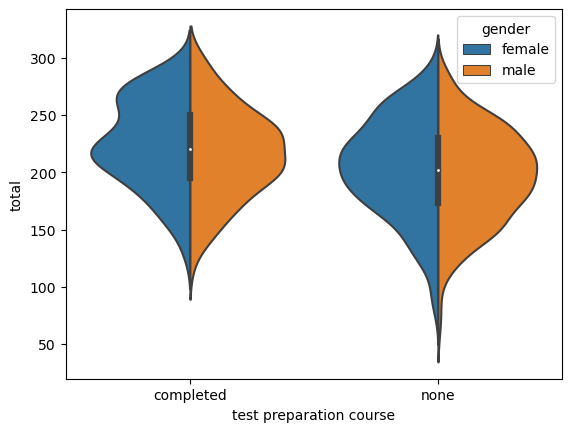

In [9]:
sns.violinplot(data=data,x='test preparation course', y='total', hue='gender', split=True)
plt.show()

In [10]:
data.gender.unique()

array(['female', 'male'], dtype=object)

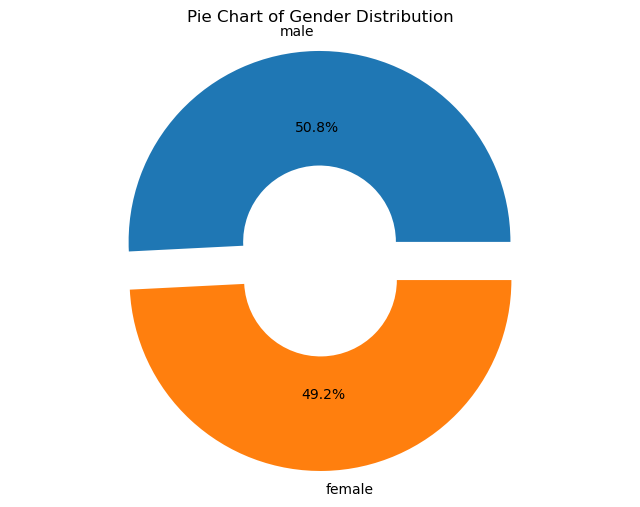

In [11]:
gender_counts = data['gender'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%',explode=[0.1,0.1],wedgeprops={'width': 0.6})
plt.title('Pie Chart of Gender Distribution')
plt.axis('equal') 
plt.show()

In [12]:
data.nunique()

gender                           2
race/ethnicity                   5
parental level of education      6
lunch                            2
test preparation course          2
math score                      79
reading score                   71
writing score                   74
total                          190
dtype: int64

In [13]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['race/ethnicity'] = le.fit_transform(data['race/ethnicity'])
data['parental level of education'] = le.fit_transform(data['parental level of education'])
data['lunch'] = le.fit_transform(data['lunch'])
data['test preparation course'] = le.fit_transform(data['test preparation course'])
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total
0,female,3,4,1,0,59,70,78,207
1,male,3,0,1,1,96,93,87,276
2,female,3,4,0,1,57,76,77,210
3,male,1,4,0,1,70,70,63,203
4,female,3,0,1,1,83,85,86,254
...,...,...,...,...,...,...,...,...,...
995,male,2,4,1,1,77,77,71,225
996,male,2,4,1,1,80,66,66,212
997,female,0,2,1,0,67,86,86,239
998,male,4,2,1,1,80,72,62,214


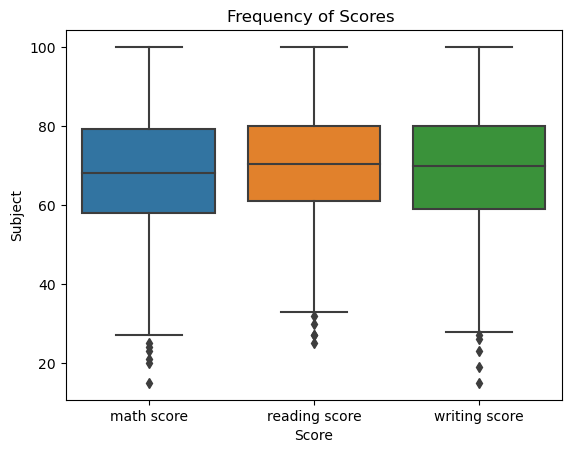

In [14]:
sns.boxplot(data=data[['math score','reading score','writing score']])
plt.xlabel('Score')
plt.ylabel('Subject')
plt.title('Frequency of Scores ')
plt.show()

### Removing Outliers

In [15]:
data = data[data['math score'] > 27]
data = data[data['reading score'] > 32]
data = data[data['writing score'] > 29]
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total
0,female,3,4,1,0,59,70,78,207
1,male,3,0,1,1,96,93,87,276
2,female,3,4,0,1,57,76,77,210
3,male,1,4,0,1,70,70,63,203
4,female,3,0,1,1,83,85,86,254
...,...,...,...,...,...,...,...,...,...
995,male,2,4,1,1,77,77,71,225
996,male,2,4,1,1,80,66,66,212
997,female,0,2,1,0,67,86,86,239
998,male,4,2,1,1,80,72,62,214


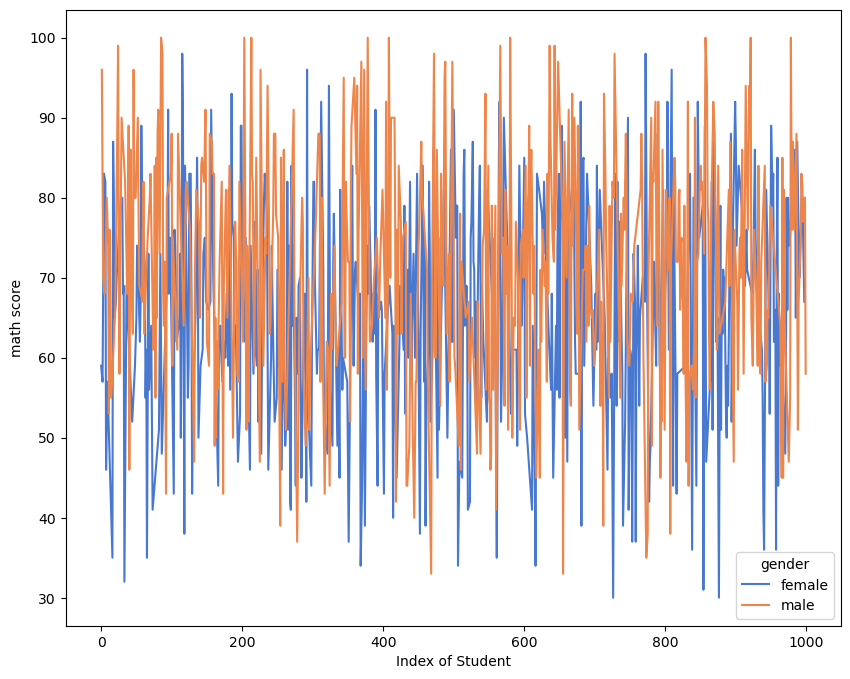

In [16]:
plt.figure(figsize=(10, 8))

sns.lineplot(data=data, x=data.index, y='math score', hue = 'gender',palette='muted')
plt.xlabel('Index of Student')
plt.show()

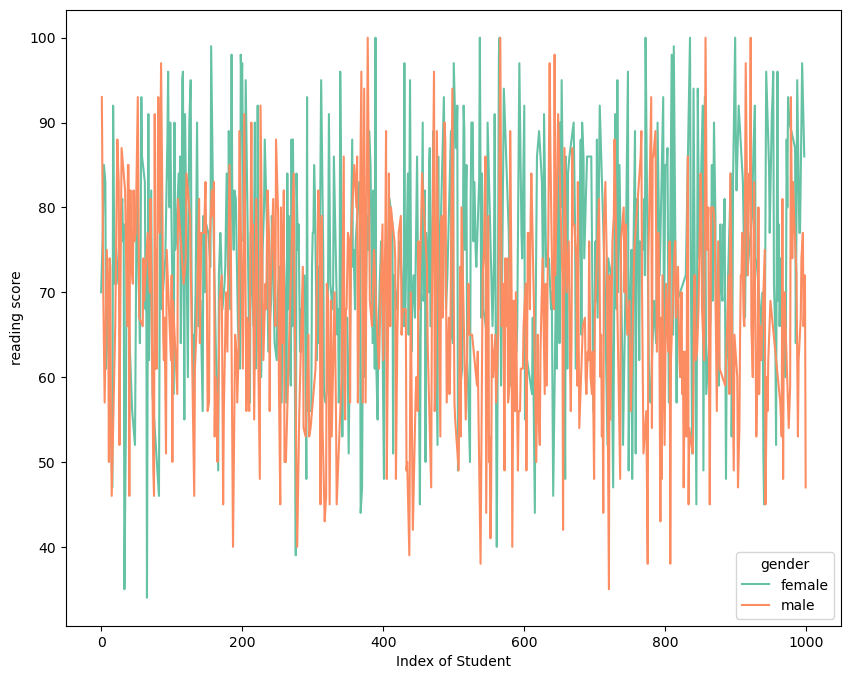

In [17]:
plt.figure(figsize=(10, 8))
sns.lineplot(data=data, x=data.index, y='reading score', hue = 'gender',palette='Set2')

plt.xlabel('Index of Student')
plt.show()

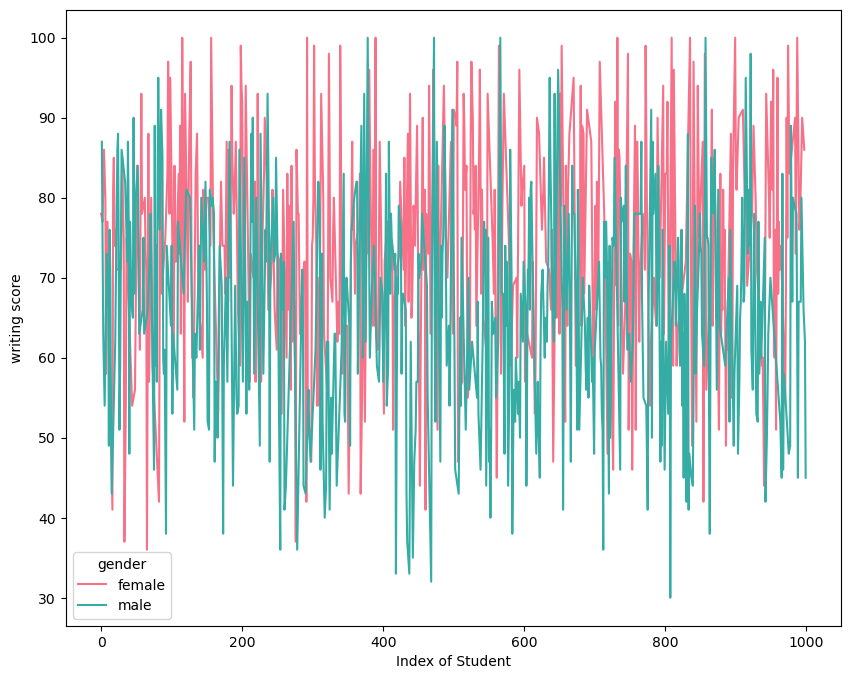

In [18]:
plt.figure(figsize=(10, 8))
sns.lineplot(data=data, x=data.index, y='writing score',hue='gender',palette = 'husl')

plt.xlabel('Index of Student')
plt.show()

In [19]:
gender1={'male':0,'female':1}
data.gender=data.gender.map(gender1)

In [20]:
x = data.drop(['math score','reading score','writing score'],axis=1)
y1 = data['math score']
y2 = data['reading score']
y3 = data['writing score']  

# Linera Regression

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

def make_model(x,y) :
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
    model = LinearRegression()
    model.fit(x_train, y_train)

    y_pred = model.predict(x_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    return mse, r2

             
res={}
for i, y in zip(['math score', 'reading score', 'writing score'], [y1, y2, y3]):
    res[i] = make_model(x,y)   
   

In [22]:
print("\t\tMeanSquareError \tR2Score")
res

		MeanSquareError 	R2Score


{'math score': (15.213398740889975, 0.9257925831365608),
 'reading score': (9.749572058606674, 0.942652673804566),
 'writing score': (6.448920192527999, 0.966517279714233)}

# Gradient Boosting Regression

In [23]:
from sklearn.ensemble import GradientBoostingRegressor

def make_model(x,y) :
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
    model = GradientBoostingRegressor(random_state=0)
    model.fit(x_train, y_train)

    y_pred = model.predict(x_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    return mse, r2

             

res={}
for i, y in zip(['math score', 'reading score', 'writing score'], [y1, y2, y3]):
    res[i] = make_model(x,y)   

In [24]:
print("\t\tMeanSquareError \tR2Score")
res

		MeanSquareError 	R2Score


{'math score': (17.032148378390076, 0.916921145871366),
 'reading score': (10.279980793366573, 0.9395327909475197),
 'writing score': (7.219448047099689, 0.962516707857737)}

# CatBoost Regression

In [25]:
from catboost import CatBoostRegressor

def make_model(x,y) :
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
    model = CatBoostRegressor(random_state=0, verbose=False)
    model.fit(x_train, y_train)

    y_pred = model.predict(x_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    return mse, r2

             

res={}
for i, y in zip(['math score', 'reading score', 'writing score'], [y1, y2, y3]):
    res[i] = make_model(x,y)   


In [26]:
print("\t\tMeanSquareError \tR2Score")
res

		MeanSquareError 	R2Score


{'math score': (17.293404740286796, 0.9156467981673655),
 'reading score': (11.166942550067853, 0.9343156506588317),
 'writing score': (7.561494091401383, 0.960740808686357)}

# RandomForest Regression

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

def make_model(x,y) :
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
    model = RandomForestRegressor(random_state=0)
    model.fit(x_train, y_train)

    y_pred = model.predict(x_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    return mse, r2
res={}
for i, y in zip(['math score', 'reading score', 'writing score'], [y1, y2, y3]):
    res[i] = make_model(x,y)  


In [28]:
print("\t\tMeanSquareError \tR2Score")
res

		MeanSquareError 	R2Score


{'math score': (18.449739318742985, 0.9100064673275201),
 'reading score': (12.29027286251403, 0.927708182201157),
 'writing score': (8.407306444023572, 0.9563493605723133)}